# Neutron output flux curves (CurrentTarget227) FOR THE NEW TARGET

- data is in /Volumes/hkromer/10_Experiments/02_MCNP/CurrentTarget227/CurrentTarget227_normal/df_flux.csv
- it is copied to /Users/hkromer/02_PhD/02_Data/06.BS_Mapping/CurrentTarget227/df_flux.csv

Settings of run 227 (see Notion card)
>New target  
Directional source 100 keV  
Tally energy binning  0.0,3.00,0.05  
Nps 2e8  
CUT:n j 1e-9  



In [1]:
outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/DetailedNeutronGeneratorCharacterization/Figures/'

In [2]:
import time
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import AutoMinorLocator
import re

import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

## Load data

In [3]:
fname = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/CurrentTarget227/df_flux.csv'

In [4]:
df = pd.read_csv(fname, index_col=0)
print(df.columns)
df.head()

Index(['W 20', 'W 45', 'W 70', 'W 95', 'W 120', 'W 145', 'W 170', 'W 195',
       'W 220', 'W 245', 'E 20', 'E 45', 'E 70', 'E 95', 'E 120', 'E 145',
       'E 170', 'E 195', 'E 220', 'E 245', 'N 20', 'N 45', 'N 70', 'N 95',
       'N 120', 'N 145', 'N 170', 'N 195', 'N 220', 'N 245', 'S 30', 'S 55',
       'S 80', 'S 105', 'S 130', 'S 155', 'S 180', 'S 205', 'S 230', 'S 255',
       'R'],
      dtype='object')


,W 20,W 45,W 70,W 95,W 120,W 145,W 170,W 195,W 220,W 245,...,S 55,S 80,S 105,S 130,S 155,S 180,S 205,S 230,S 255,R
energy,,,,,,,,,,,,,,,,,,,,,
-1.000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.004000
0.025,0.000005,3.582950e-06,3.329240e-06,3.247610e-06,3.181140e-06,3.125200e-06,3.080900e-06,3.023180e-06,2.998690e-06,2.980080e-06,...,3.151850e-06,3.175200e-06,3.146980e-06,3.096070e-06,3.038670e-06,2.997140e-06,2.957620e-06,2.930760e-06,2.929590e-06,0.124000
0.075,0.000001,3.303710e-07,1.976360e-07,1.519000e-07,1.301420e-07,1.174500e-07,1.106890e-07,1.023740e-07,9.990000e-08,9.618150e-08,...,1.919750e-07,1.373550e-07,1.160350e-07,1.067010e-07,9.906630e-08,9.358980e-08,8.976390e-08,8.888720e-08,8.611370e-08,0.170167
0.125,0.000001,3.145970e-07,1.774260e-07,1.293790e-07,1.064520e-07,9.362460e-08,8.606550e-08,8.005420e-08,7.549310e-08,7.262130e-08,...,1.787950e-07,1.177940e-07,9.362730e-08,8.334210e-08,7.596180e-08,7.105310e-08,6.704960e-08,6.445620e-08,6.265300e-08,0.237500
0.175,0.000001,2.858710e-07,1.558160e-07,1.114580e-07,9.085140e-08,7.995460e-08,7.259900e-08,6.720250e-08,6.340510e-08,6.046610e-08,...,1.652800e-07,1.019550e-07,7.907690e-08,7.020660e-08,6.282710e-08,5.871400e-08,5.627510e-08,5.458340e-08,5.234290e-08,0.309500


### Units df

- energy: mid bin energy in MeV
- columns: F4 tally, average flux in the cell. Numbers per cm2 per source particle

(8.941598742046941e-10, 0.005989336960980677)


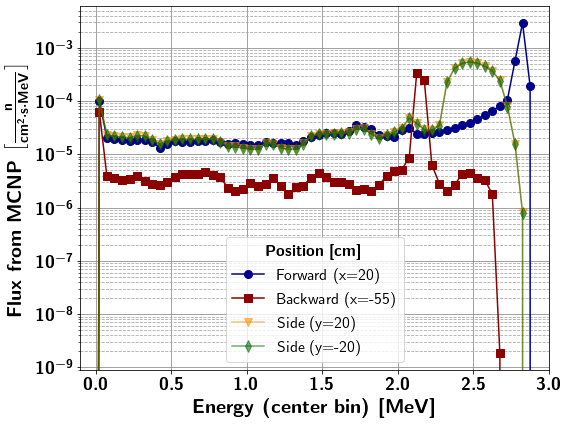

In [5]:
fig = plt.figure(figsize=(8, 6))
fs = 20
markersize = 8
figname = 'MCNP_flux_close'
ebin = 0.05
nps = 2e8

# 20 cm North
plt.plot(df.index.values, df['N 20'].values/ebin, marker='o', color='darkblue', markersize=markersize, label=r'Forward (x=20)')
# plt.plot(df.index.values, nps*df['N 20'].values/ebin, marker='o', color='darkblue', markersize=markersize, label=r'Forward (x=20)')
# 55 cm South
plt.plot(df.index.values, df['S 55'].values/ebin, marker='s', color='darkred', markersize=markersize, label=r'Backward (x=-55)')
# 20 cm West
plt.plot(df.index.values, df['W 20'].values/ebin, marker='v', color='darkorange', markersize=markersize, label=r'Side (y=20)', alpha=0.55)
# 20 cm East
plt.plot(df.index.values, df['E 20'].values/ebin, marker='d', color='darkgreen', markersize=markersize, label=r'Side (y=-20)', alpha=0.55)

ax1 = plt.gca()
plt.yscale('log')
ylim = ax1.get_ylim()
print(ylim)
plt.xlim(-0.1, 3.0)
plt.ylim(ylim)

plt.xlabel(r"\textbf{Energy (center bin) [MeV]}", fontsize=fs)
plt.ylabel(r"\textbf{Flux from MCNP $\left[ \frac{n}{cm^2 \cdot s \cdot MeV} \right]$", fontsize=fs)

ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)
plt.grid(which="minor",ls="--", color='0.65')
plt.grid(which="major",ls="-", color='0.55')
leg = plt.legend(fontsize=fs-4)
leg.set_title(r"\textbf{Position [cm]}", prop = {'size': fs-4})
plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}/{figname}.pdf')
plt.show()

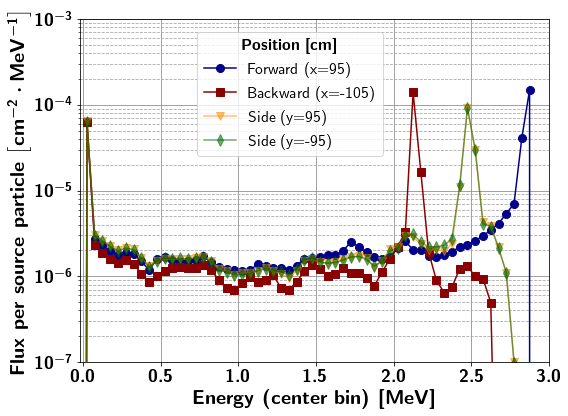

In [11]:
fig = plt.figure(figsize=(8, 6))
fs = 20
markersize = 8
figname = 'MCNP_flux_far'
ebin = 0.05
nps = 2e8


# 20 cm North
plt.plot(df.index.values, (1/ebin)*df['N 95'].values, marker='o', color='darkblue', markersize=markersize, label=r'Forward (x=95)')
# 55 cm South
plt.plot(df.index.values, (1/ebin)*df['S 105'].values, marker='s', color='darkred', markersize=markersize, label=r'Backward (x=-105)')
# 20 cm West
plt.plot(df.index.values, (1/ebin)*df['W 95'].values, marker='v', color='darkorange', markersize=markersize, label=r'Side (y=95)', alpha=0.55)
# 20 cm East
plt.plot(df.index.values, (1/ebin)*df['E 95'].values, marker='d', color='darkgreen', markersize=markersize, label=r'Side (y=-95)', alpha=0.55)


ax1 = plt.gca()
plt.yscale('log')

# take the same ylim as in the previous graph
# ylim = ax1.get_ylim()
ylim = [1e-7,1e-3]
plt.xlim(-0.05, 3.0)
plt.ylim(ylim)

plt.xlabel(r"\textbf{Energy (center bin) [MeV]}", fontsize=fs)
plt.ylabel(r"\textbf{Flux per source particle }" + r"$\left[ cm^{-2} \cdot MeV^{-1} \right]$", fontsize=fs)

ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)
plt.grid(which="minor",ls="--", color='0.65')
plt.grid(which="major",ls="-", color='0.55')
leg = plt.legend(loc=[0.25,0.6], fontsize=fs-4)
leg.set_title(r"\textbf{Position [cm]}", prop = {'size': fs-4})
plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}/{figname}.pdf')


df_output = pd.DataFrame()
output_file = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/flux_95to105cm.csv'# for Robert
df_output['N 95'] = (nps/ebin)*df['N 95']
df_output['S 105'] = (nps/ebin)*df['S 105']
df_output['W 95'] = (nps/ebin)*df['W 95']
df_output['E 95'] = (nps/ebin)*df['E 95']
df_output.to_csv(output_file)
# fig = plt.figure(figsize=(8, 6))
# for col in df_output.columns:
#     plt.plot(df_output.index, df_output[col])
# plt.yscale('log')
plt.xlim(-0.02, 3.0)
# plt.ylim(ylim)
plt.show()

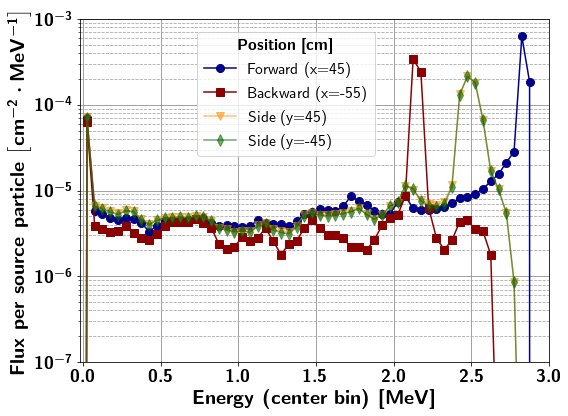

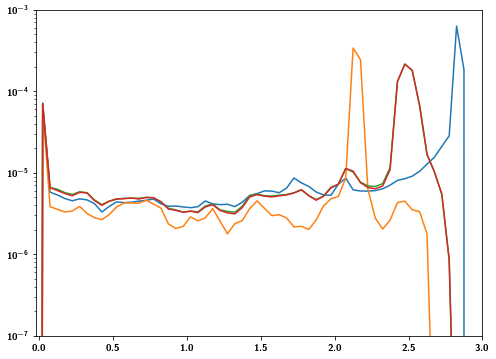

In [13]:
fig = plt.figure(figsize=(8, 6))
fs = 20
markersize = 8
figname = 'MCNP_flux_mid'
ebin = 0.05
nps = 2e8

# 20 cm North
plt.plot(df.index.values, (1/ebin)*df['N 45'].values, marker='o', color='darkblue', markersize=markersize, label=r'Forward (x=45)')
# 55 cm South
plt.plot(df.index.values, (1/ebin)*df['S 55'].values, marker='s', color='darkred', markersize=markersize, label=r'Backward (x=-55)')
# 20 cm West
plt.plot(df.index.values, (1/ebin)*df['W 45'].values, marker='v', color='darkorange', markersize=markersize, label=r'Side (y=45)', alpha=0.55)
# 20 cm East
plt.plot(df.index.values, (1/ebin)*df['E 45'].values, marker='d', color='darkgreen', markersize=markersize, label=r'Side (y=-45)', alpha=0.55)

ax1 = plt.gca()
plt.yscale('log')
# ylim = ax1.get_ylim()
ylim = [1e-7,1e-3]

plt.xlim(-0.05, 3.0)
plt.ylim(ylim)

plt.xlabel(r"\textbf{Energy (center bin) [MeV]}", fontsize=fs)
plt.ylabel(r"\textbf{Flux per source particle }" + r"$\left[ cm^{-2} \cdot MeV^{-1} \right]$", fontsize=fs)


ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)
plt.grid(which="minor",ls="--", color='0.65')
plt.grid(which="major",ls="-", color='0.55')
leg = plt.legend(loc=[0.25,0.6], fontsize=fs-4)
leg.set_title(r"\textbf{Position [cm]}", prop = {'size': fs-4})
plt.xlim(-0.02, 3.0)

plt.tight_layout()
plt.savefig(f'{outputfolder}/{figname}/{figname}.pdf')
plt.show()

df_output = pd.DataFrame()
output_file = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/flux_45to55cm.csv'# for Robert
df_output['N 45'] = (1/ebin)*df['N 45']
df_output['S 55'] = (1/ebin)*df['S 55']
df_output['W 45'] = (1/ebin)*df['W 45']
df_output['E 45'] = (1/ebin)*df['E 45']
df_output.to_csv(output_file)
fig = plt.figure(figsize=(8, 6))
for col in df_output.columns:
    plt.plot(df_output.index, df_output[col])
plt.yscale('log')
plt.xlim(-0.02, 3.0)
plt.ylim(ylim)
plt.show()

In [8]:
# export all in one file for Robert
df_output = pd.DataFrame()
output_file = '/Users/hkromer/02_PhD/02_Data/06.BS_Mapping/flux_both.csv'# for Robert
df_output['N 95'] = (1/ebin)*df['N 95']
df_output['S 105'] = (1/ebin)*df['S 105']
df_output['W 95'] = (1/ebin)*df['W 95']
df_output['E 95'] = (1/ebin)*df['E 95']
df_output['N 45'] = (1/ebin)*df['N 45']
df_output['S 55'] = (1/ebin)*df['S 55']
df_output['W 45'] = (1/ebin)*df['W 45']
df_output['E 45'] = (1/ebin)*df['E 45']
df_output.to_csv(output_file)

In [9]:
for i in list(df_output.columns):
    print(i)

N 95
S 105
W 95
E 95
N 45
S 55
W 45
E 45


In [19]:
np.max((1/ebin)*df['W 95'].values)

9.18508e-05

In [17]:
fwd = (1/ebin)*df['N 95'].values
# 55 cm South
backwd = (1/ebin)*df['S 105'].values
np.max(fwd)*1e4, np.max(backwd)*1e4

(1.49516, 1.391904)